# DMDW-Tutorial-4-C11+C12-slot

### Submitted By:
### Indrashis Paul - 19MIM10046

In [ ]:
# Installing the required packages
# %pip install mlxtend

## Step 1: Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

## Step 2 : Data Pre-processing 

In [4]:
# Importing the dataset
# we will ignore the headers as our csv files contains the records from first row itself
df = pd.read_csv('./data/store_data.csv',header=None)
print(df.shape)
df.head()

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# now we need to convirt this data into proper format that cam be fed to Apriori Algorithm. 
# columns should represent unique items and rows must represent transactions. True will represent that item is the part of that transaction.

In [6]:
final_data = pd.DataFrame(columns=['Transaction','Items'])
df = df.T
for col in df.columns:
    col_data = list(df[col].dropna())
    temp_dict = {'Transaction':[int(col)]*len(col_data),  'Items':col_data }
    temp_df = pd.DataFrame(temp_dict)
    final_data = final_data.append(temp_df,ignore_index=True)
final_data.head()

/tmp/ipykernel_238002/448523989.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(temp_df,ignore_index=True)


KeyboardInterrupt: 

In [16]:
final_data_dummy = pd.get_dummies(final_data['Items'])
final_data_dummy['Transaction'] = final_data['Transaction']
# i don't want the quantity, I want just that product is bought or #not(after doing dummy yow will get 2 if same item bought twice in a #transaction) so i will use encode_units function
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
format_data= final_data_dummy.groupby('Transaction').sum()
format_data = format_data.applymap(encode_units)
format_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##### Above data is in the required format

## Step 3 : EDA

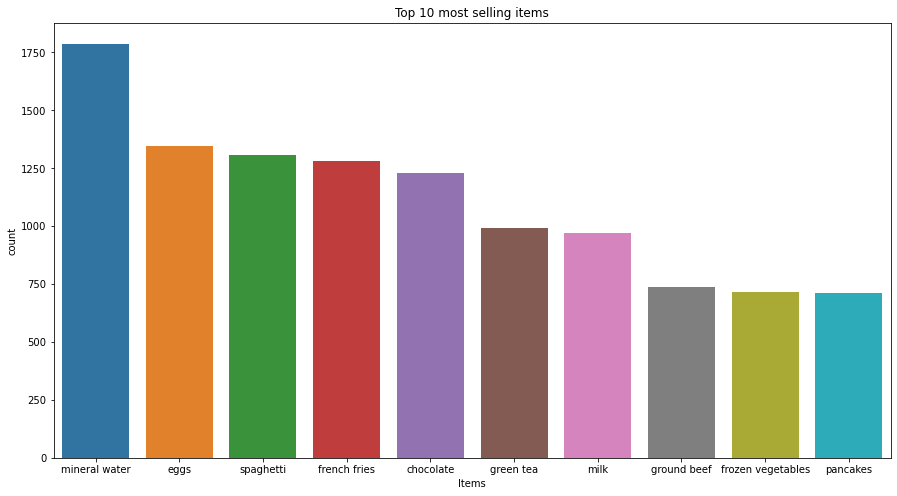

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
order = final_data['Items'].value_counts()[:10].index
sns.countplot(x = 'Items',data=final_data,order = order)
plt.title('Top 10 most selling items')
plt.show()

In [15]:
# unique items and total number of transactions
len(final_data['Items'].unique())
len(final_data['Transaction'].unique())

7501

## Step 4: Modelling

In [20]:
frequent_itemsets  =  apriori(format_data, min_support = 0.01, use_colnames = True)
frequent_itemsets.head()

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [22]:
# No lets apply association rules

In [23]:
result = association_rules(frequent_itemsets, metric = "lift", min_threshold=0.01)
result.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
239,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
238,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
412,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
409,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
425,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
...,...,...,...,...,...,...,...,...,...
62,(cookies),(chocolate),0.080389,0.163845,0.010399,0.129353,0.789486,-0.002773,0.960384
120,(escalope),(eggs),0.079323,0.179709,0.011065,0.139496,0.776230,-0.003190,0.953267
121,(eggs),(escalope),0.179709,0.079323,0.011065,0.061573,0.776230,-0.003190,0.981085
106,(cookies),(eggs),0.080389,0.179709,0.010532,0.131012,0.729019,-0.003915,0.943960


<center>----------End---------</center>